In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('C:\\Users\\hp\\Desktop\\files\\EV\\alt_fuel_stations (Jul 29 2021).csv')

# Filter for Electric Vehicle stations only
df_ev = df[df['Fuel Type Code'] == 'ELEC'].copy()

# Drop irrelevant or mostly empty columns (especially French and alternative fuels)
cols_to_drop = [col for col in df_ev.columns if 'French' in col or df_ev[col].isnull().sum() > 50000]
df_ev.drop(columns=cols_to_drop, inplace=True)

# Keep only useful columns
relevant_columns = [
    'Station Name', 'Street Address', 'City', 'State', 'ZIP', 'Latitude', 'Longitude',
    'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count',
    'EV Connector Types', 'EV Network', 'EV Pricing', 'Open Date', 'Access Days Time',
    'Groups With Access Code', 'Status Code'
]
df_ev = df_ev[relevant_columns]

# Convert date and numeric fields
df_ev['Open Date'] = pd.to_datetime(df_ev['Open Date'], errors='coerce')
df_ev[['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']] = df_ev[
    ['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']
].fillna(0)

# Create a total chargers column
df_ev['Total Chargers'] = df_ev['EV Level1 EVSE Num'] + df_ev['EV Level2 EVSE Num'] + df_ev['EV DC Fast Count']

# Preview cleaned data
df_ev.head()


C:\Users\hp\AppData\Local\Temp\ipykernel_9020\2464645893.py:4: DtypeWarning: Columns (3,6,10,13,14,15,16,20,29,31,33,34,35,36,43,45,46,47,49,52,53,54,56,57,58,59,60,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\hp\\Desktop\\files\\EV\\alt_fuel_stations (Jul 29 2021).csv')


,Station Name,Street Address,City,State,ZIP,Latitude,Longitude,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Connector Types,EV Network,EV Pricing,Open Date,Access Days Time,Groups With Access Code,Status Code,Total Chargers
159,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,34.248319,-118.387971,0.0,39.0,3.0,CHADEMO J1772 J1772COMBO,Non-Networked,NaN,1999-10-15,Fleet use only,Private,E,42.0
160,LADWP - West LA District Office,1394 S Sepulveda Blvd,Los Angeles,CA,90024,34.052542,-118.448504,0.0,4.0,0.0,J1772,Non-Networked,Free,2020-02-28,NaN,Private,E,4.0
161,Southern California Edison - Rosemead Office B...,2244 Walnut Grove Ave,Rosemead,CA,91770,34.050745,-118.081014,22.0,22.0,0.0,J1772 NEMA520,Greenlots,NaN,2011-08-01,Employee use only,TEMPORARILY UNAVAILABLE (Private),T,44.0
162,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,34.040539,-118.271387,0.0,12.0,0.0,J1772,Non-Networked,NaN,1995-08-30,24 hours daily; pay lot,Public,E,12.0
163,LADWP - John Ferraro Building,111 N Hope St,Los Angeles,CA,90012,34.059133,-118.248589,0.0,311.0,2.0,CHADEMO J1772 J1772COMBO,Non-Networked,NaN,1999-10-15,For fleet and employee use only,Private,E,313.0


In [2]:
# Show columns with missing values and their counts
missing_values = df_ev.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values found:\n", missing_values)


Missing values found:
 EV Connector Types       20
EV Network                6
EV Pricing            32764
Open Date              1295
Access Days Time       2069
dtype: int64


In [3]:
# Drop rows missing connector types (essential for classification)
df_ev = df_ev.dropna(subset=['EV Connector Types'])

# Drop rows missing Open Date (especially if you're doing time-based analysis)
df_ev = df_ev.dropna(subset=['Open Date'])

# Fill less important fields with 'Unknown'
df_ev['EV Network'] = df_ev['EV Network'].fillna('Unknown')
df_ev['EV Pricing'] = df_ev['EV Pricing'].fillna('Unknown')
df_ev['Access Days Time'] = df_ev['Access Days Time'].fillna('Unknown')


In [4]:
# Recheck if anything is still missing
print("Remaining missing values:\n", df_ev.isnull().sum()[df_ev.isnull().sum() > 0])


Remaining missing values:
 Series([], dtype: int64)


In [5]:
# Check current data types
df_ev.dtypes


Station Name                       object
Street Address                     object
City                               object
State                              object
ZIP                                object
Latitude                          float64
Longitude                         float64
EV Level1 EVSE Num                float64
EV Level2 EVSE Num                float64
EV DC Fast Count                  float64
EV Connector Types                 object
EV Network                         object
EV Pricing                         object
Open Date                  datetime64[ns]
Access Days Time                   object
Groups With Access Code            object
Status Code                        object
Total Chargers                    float64
dtype: object

In [6]:
# Convert Open Date
df_ev['Open Date'] = pd.to_datetime(df_ev['Open Date'], errors='coerce')

# Ensure charger count columns are integers
charger_cols = ['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']
df_ev[charger_cols] = df_ev[charger_cols].fillna(0).astype(int)

# Create a new column: total chargers
df_ev['Total Chargers'] = df_ev['EV Level1 EVSE Num'] + df_ev['EV Level2 EVSE Num'] + df_ev['EV DC Fast Count']


In [7]:
# Quick preview of 5 rows
df_ev[["Open Date", "EV Level1 EVSE Num", "EV Level2 EVSE Num", "EV DC Fast Count", "Total Chargers"]].sample(5)


,Open Date,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,Total Chargers
45998,2021-01-27,0,2,0,2
45829,2021-01-27,0,2,0,2
19115,2017-09-01,0,6,0,6
32270,2020-06-12,0,2,0,2
30284,2020-05-15,0,2,0,2


In [8]:
# Convert charger columns to int
charger_cols = ['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'Total Chargers']
df_ev[charger_cols] = df_ev[charger_cols].astype(int)


In [9]:
# Confirm all are now integers
print(df_ev[charger_cols].dtypes)


EV Level1 EVSE Num    int32
EV Level2 EVSE Num    int32
EV DC Fast Count      int32
Total Chargers        int32
dtype: object


In [10]:
# Check for full duplicate rows
duplicate_count = df_ev.duplicated().sum()
print("Duplicate rows found:", duplicate_count)


Duplicate rows found: 10


In [11]:
# Drop full duplicates
df_ev = df_ev.drop_duplicates()


In [12]:
df_ev.sample(5)


,Station Name,Street Address,City,State,ZIP,Latitude,Longitude,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Connector Types,EV Network,EV Pricing,Open Date,Access Days Time,Groups With Access Code,Status Code,Total Chargers
51481,IRVINE CIV CTR DCFAST CHARGER2,1 Civic Center Plaza,Irvine,CA,92606,33.687116,-117.827007,0,0,1,CHADEMO J1772COMBO,ChargePoint Network,Unknown,2021-02-20,24 hours daily,Public,E,1
13684,University of Connecticut - Storrs Center Garage,33 Royce Cir,Storrs,CT,6268,41.804197,-72.244222,0,4,0,J1772,Non-Networked,Variable parking fee,2017-05-01,24 hours daily,Public - Credit card at all times,E,4
48323,TOWERS AT SHORE 205 STATION 3,203 Redwood Shores Pkwy,Redwood City,CA,94065,37.521527,-122.254910,0,2,0,J1772,ChargePoint Network,Unknown,2021-01-27,24 hours daily,Public,E,2
10828,San Joaquin Valley Air Pollution Control Distr...,34946 Flyover Ct,Bakersfield,CA,93308,35.454891,-119.078333,0,3,0,J1772,Non-Networked,Free,2014-09-01,8am-5pm M-F,Public,E,3
43942,SANTA MONICA GW G7 #3,350 Broadway,Santa Monica,CA,90401,34.014509,-118.493675,0,2,0,J1772,ChargePoint Network,Unknown,2021-01-27,24 hours daily,Public,E,2


In [13]:
# Check if coordinates fall outside valid geographic ranges
invalid_coords = df_ev[
    (df_ev['Latitude'] < -90) | (df_ev['Latitude'] > 90) |
    (df_ev['Longitude'] < -180) | (df_ev['Longitude'] > 180)
]

print("Stations with invalid coordinates:", invalid_coords.shape[0])

# Check if any station has 0,0 coordinates (probably invalid)
zero_coords = df_ev[(df_ev['Latitude'] == 0) & (df_ev['Longitude'] == 0)]
print("Stations with (0,0) coordinates:", zero_coords.shape[0])


Stations with invalid coordinates: 0
Stations with (0,0) coordinates: 0


C:\Users\hp\AppData\Local\Temp\ipykernel_9020\2248641815.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")


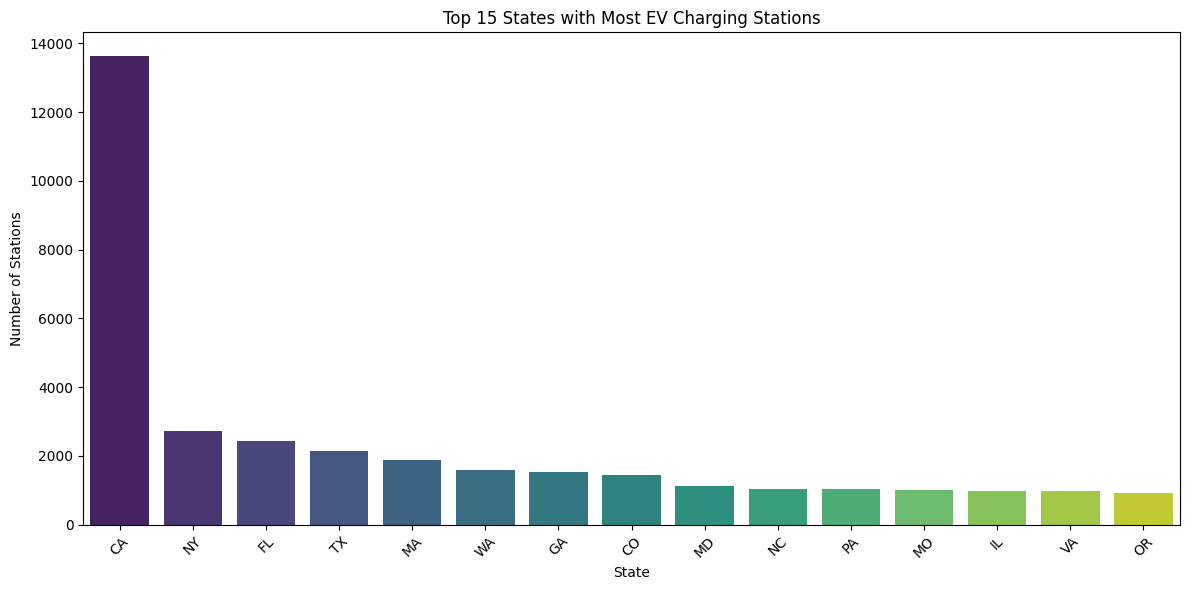

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 15 states by number of stations
state_counts = df_ev['State'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")
plt.title("Top 15 States with Most EV Charging Stations")
plt.xlabel("State")
plt.ylabel("Number of Stations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


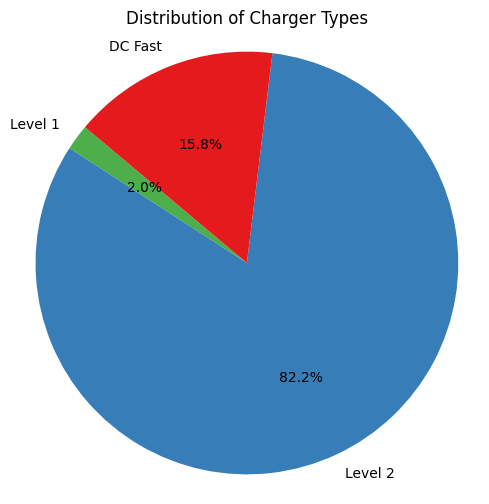

In [15]:
# Sum up each charger type
charger_counts = {
    'Level 1': df_ev['EV Level1 EVSE Num'].sum(),
    'Level 2': df_ev['EV Level2 EVSE Num'].sum(),
    'DC Fast': df_ev['EV DC Fast Count'].sum()
}

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(charger_counts.values(), labels=charger_counts.keys(), autopct='%1.1f%%', startangle=140, colors=['#4daf4a','#377eb8','#e41a1c'])
plt.title('Distribution of Charger Types')
plt.axis('equal')
plt.show()


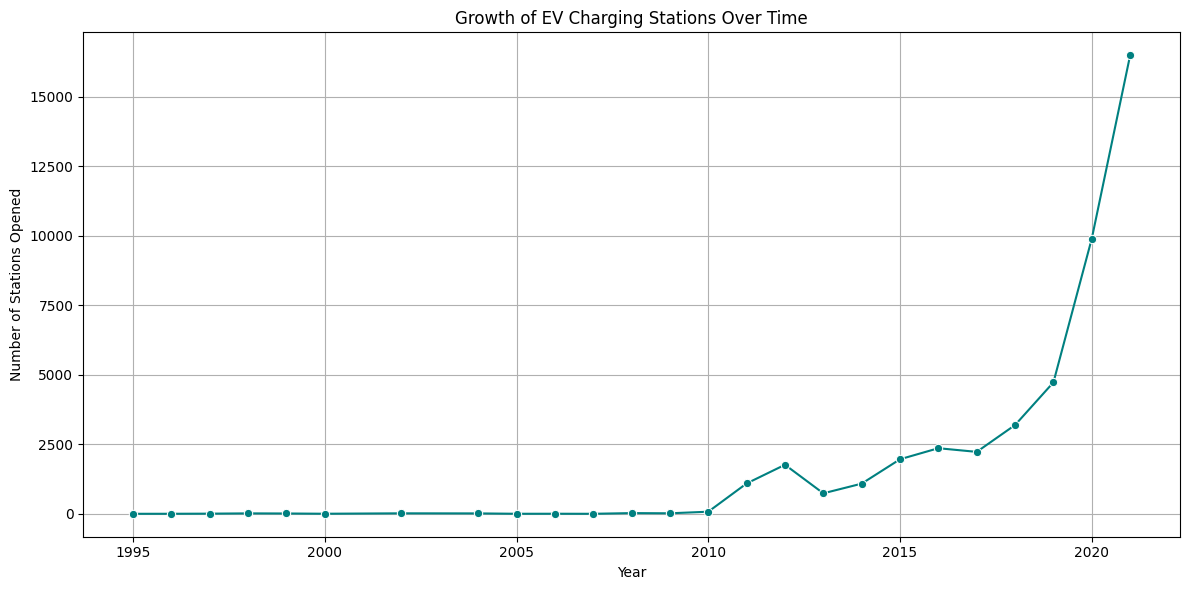

In [16]:
# Extract year from 'Open Date'
df_ev['Open Year'] = df_ev['Open Date'].dt.year

# Count stations opened per year
yearly_counts = df_ev['Open Year'].value_counts().sort_index()

# Plot it
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='teal')
plt.title("Growth of EV Charging Stations Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Stations Opened")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_9020\4071670903.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_networks.values, y=top_networks.index, palette="coolwarm")


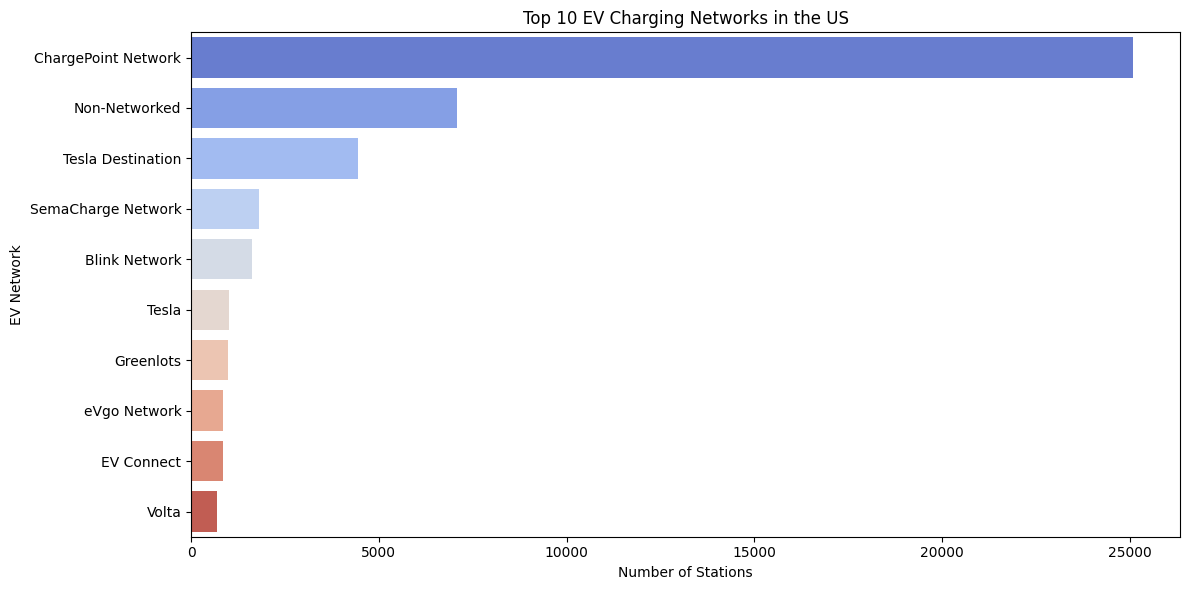

In [17]:
# Count top 10 EV networks
top_networks = df_ev['EV Network'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_networks.values, y=top_networks.index, palette="coolwarm")
plt.title("Top 10 EV Charging Networks in the US")
plt.xlabel("Number of Stations")
plt.ylabel("EV Network")
plt.tight_layout()
plt.show()


In [18]:
import sys
!{sys.executable} -m pip install folium

In [19]:
!pip install folium


In [20]:
import folium
from folium.plugins import MarkerCluster

# Create a base map centered on the US
us_center = [39.8283, -98.5795]  # Approximate center of continental US
ev_map = folium.Map(location=us_center, zoom_start=5)

# Add marker cluster for efficiency
marker_cluster = MarkerCluster().add_to(ev_map)

# Sample 1000 rows for faster rendering
sample_df = df_ev.sample(1000, random_state=1)

# Add each charging station to the map
for idx, row in sample_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"<b>{row['Station Name']}</b><br>{row['City']}, {row['State']}",
        icon=folium.Icon(color='blue', icon='bolt', prefix='fa')
    ).add_to(marker_cluster)

# Save the map to an HTML file
ev_map.save("ev_station_map.html")

print("✅ Map saved as 'ev_station_map.html'. You can open it in your browser!")

✅ Map saved as 'ev_station_map.html'. You can open it in your browser!


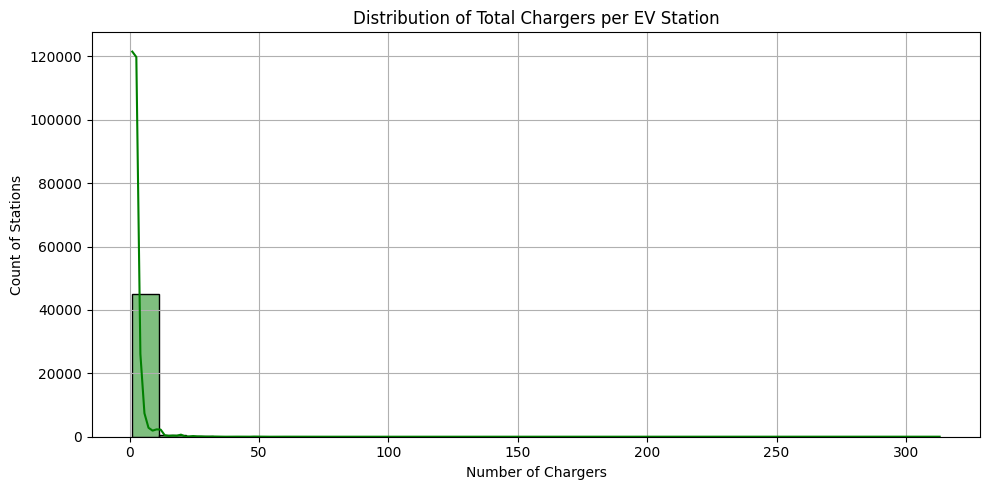

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(df_ev['Total Chargers'], bins=30, kde=True, color='green')
plt.title("Distribution of Total Chargers per EV Station")
plt.xlabel("Number of Chargers")
plt.ylabel("Count of Stations")
plt.grid(True)
plt.tight_layout()
plt.show()


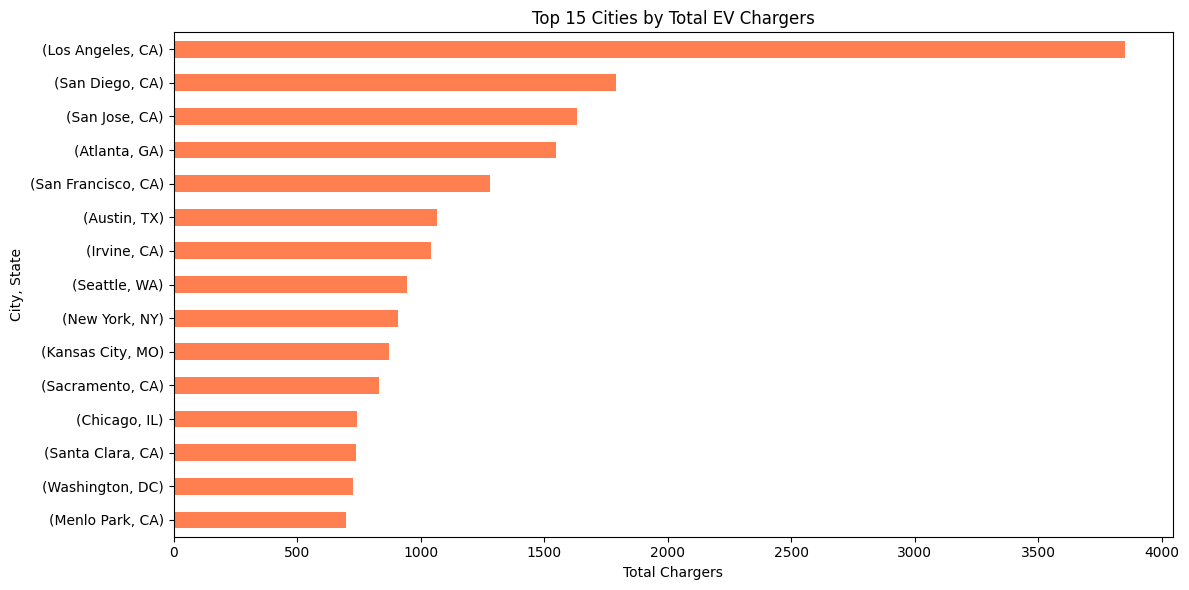

In [22]:
top_cities = df_ev.groupby(['City', 'State'])['Total Chargers'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
top_cities.plot(kind='barh', color='coral')
plt.title("Top 15 Cities by Total EV Chargers")
plt.xlabel("Total Chargers")
plt.ylabel("City, State")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [23]:
from datetime import datetime

# Create a column for station age (in years)
df_ev['Station Age (Years)'] = (datetime.now() - df_ev['Open Date']).dt.days / 365
df_ev['Station Age (Years)'] = df_ev['Station Age (Years)'].fillna(0)

# Normalize total chargers and age
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_ev[['Total Chargers (Norm)', 'Station Age (Norm)']] = scaler.fit_transform(
    df_ev[['Total Chargers', 'Station Age (Years)']]
)

# Calculate proxy utilization score
# (Older stations with fewer chargers = more likely overutilized)
df_ev['Utilization Score'] = df_ev['Station Age (Norm)'] - df_ev['Total Chargers (Norm)']


In [24]:
# Top 10 potentially overutilized
overutilized = df_ev.sort_values('Utilization Score', ascending=False).head(10)

# Top 10 potentially underutilized
underutilized = df_ev.sort_values('Utilization Score').head(10)

# Show both
print("🔺 Top Overutilized Stations:")
display(overutilized[['Station Name', 'City', 'State', 'Total Chargers', 'Station Age (Years)', 'Utilization Score']])

print("\n🔻 Top Underutilized Stations:")
display(underutilized[['Station Name', 'City', 'State', 'Total Chargers', 'Station Age (Years)', 'Utilization Score']])


🔺 Top Overutilized Stations:


,Station Name,City,State,Total Chargers,Station Age (Years),Utilization Score
162,Los Angeles Convention Center,Los Angeles,CA,12,29.671233,0.964744
170,California Air Resources Board,El Monte,CA,3,28.542466,0.950624
165,State Capitol Parking Garage,Sacramento,CA,9,28.542466,0.931393
176,Scripps Green Hospital,La Jolla,CA,1,27.753425,0.927000
181,City of Pasadena - De Lacey Garage,Pasadena,CA,2,27.668493,0.920562
182,City of Pasadena - Schoolhouse Garage,Pasadena,CA,3,27.668493,0.917357
179,Galleria at Tyler,Riverside,CA,4,27.668493,0.914151
183,Pasadena Hilton,Pasadena,CA,4,27.665753,0.914047
209,Universal City Hilton,Universal City,CA,1,26.920548,0.895297
200,Courtyard Marriott - Oxnard Ventura,Oxnard,CA,1,26.920548,0.895297



🔻 Top Underutilized Stations:


,Station Name,City,State,Total Chargers,Station Age (Years),Utilization Score
37640,Tesla Gigafactory - Tesla Destination,Sparks,NV,128,4.473973,-0.366171
34471,EVCN_Harborwalk_Oakland_S,Oakland,CA,105,4.819178,-0.279313
38941,City of San Francisco - 49 SVN,San Francisco,CA,91,4.909589,-0.231000
14380,NREL Employee Parking Garage,Golden,CO,108,7.528767,-0.185789
37776,California Institute of Technology - Californi...,Pasadena,CA,71,4.457534,-0.184105
37603,SpaceX HQ - Tesla Destination,Hawthorne,CA,70,4.473973,-0.180274
6752,San Diego Gas and Electric,San Diego,CA,156,12.117808,-0.164956
38837,23andMe - Headquarters,Sunnyvale,CA,73,5.232877,-0.161002
163,LADWP - John Ferraro Building,Los Angeles,CA,313,25.542466,-0.157159
8234,Yahoo,Sunnyvale,CA,142,11.232877,-0.153769


In [25]:
from sklearn.cluster import KMeans
import numpy as np

# Features for clustering
cluster_df = df_ev[['Latitude', 'Longitude', 'Utilization Score']].dropna()

# Choose number of clusters
k = 5  # You can change this later

kmeans = KMeans(n_clusters=k, random_state=42)
cluster_df['Cluster'] = kmeans.fit_predict(cluster_df)

# Merge cluster info back to main dataframe
df_ev = df_ev.join(cluster_df['Cluster'], how='left')


In [26]:
import folium
from folium.plugins import MarkerCluster

colors = ['red', 'blue', 'green', 'purple', 'orange']

ev_map_clustered = folium.Map(location=[39.8283, -98.5795], zoom_start=5)
marker_cluster = MarkerCluster().add_to(ev_map_clustered)

for _, row in df_ev.dropna(subset=['Cluster']).iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}<br>Cluster: {int(row['Cluster'])}<br>Score: {row['Utilization Score']:.2f}",
        icon=folium.Icon(color=colors[int(row['Cluster']) % len(colors)])
    ).add_to(marker_cluster)

# Save the clustered map
ev_map_clustered.save("ev_clusters_map.html")
print("📍 Clustered map saved as 'ev_clusters_map.html'")


📍 Clustered map saved as 'ev_clusters_map.html'


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_ml = df_ev.copy()

cat_cols = ['EV Connector Types', 'EV Network', 'City', 'State', 'Status Code']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col].astype(str))
    label_encoders[col] = le

# Features and target
features = ['Latitude', 'Longitude', 'EV Connector Types', 'EV Network',
            'City', 'State', 'Station Age (Years)', 'Status Code']
target = 'Total Chargers'

X = df_ml[features]
y = df_ml[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 14.77
R² Score: 0.26


In [30]:
df_ml['Predicted Chargers'] = model.predict(X)
df_ml['Charger Gap'] = df_ml['Predicted Chargers'] - df_ml['Total Chargers']

# Show stations with biggest gap
demand_gap = df_ml.sort_values('Charger Gap', ascending=False).head(10)
display(demand_gap[['Station Name', 'City', 'State', 'Total Chargers', 'Predicted Chargers', 'Charger Gap']])


,Station Name,City,State,Total Chargers,Predicted Chargers,Charger Gap
25017,ProjectGreenHome.org,3344,4,2,35.900,33.900
37349,Hawthorne - Tesla Destination,1862,4,8,39.660,31.660
2395,Nut Tree Village,4569,4,2,33.140,31.140
27733,University Club Pasadena,3375,4,14,38.960,24.960
25682,"Walgreens - Brooklyn, NY #15097",513,34,1,24.450,23.450
3165,City of Little Rock,2471,2,4,26.200,22.200
38944,County of Los Angeles - Carson Library,651,4,4,25.515,21.515
38838,23andMe - DC Fast Charger,4346,4,2,20.860,18.860
1448,City of Vacaville - Regional Transport Center,4569,4,3,21.490,18.490
37717,Vista Sothebys international Realty - Tesla De...,3768,4,2,18.030,16.030


In [31]:
df_ml.to_csv("ev_station_final_data.csv", index=False)
print("Data exported to ev_station_final_data.csv")

Data exported to ev_station_final_data.csv


In [33]:
# Reverse transform to restore city and state names
df_ml['City'] = label_encoders['City'].inverse_transform(df_ml['City'])
df_ml['State'] = label_encoders['State'].inverse_transform(df_ml['State'])

# Save the final dataset
df_ml.to_csv("ev_station_final_clean.csv", index=False)
print("✅ Final data exported as 'ev_station_final_clean.csv'")


✅ Final data exported as 'ev_station_final_clean.csv'


In [35]:
for col in ['EV Connector Types', 'EV Network', 'City', 'State', 'Status Code']:
    if col in label_encoders:
        try:
            df_ml[col] = label_encoders[col].inverse_transform(df_ml[col])
        except Exception as e:
            print(f"❌ Error decoding {col}: {e}")


❌ Error decoding EV Connector Types: y contains previously unseen labels: ['CHADEMO' 'CHADEMO J1772' 'CHADEMO J1772 J1772COMBO'
 'CHADEMO J1772 J1772COMBO NEMA520' 'CHADEMO J1772 J1772COMBO TESLA'
 'CHADEMO J1772 NEMA515' 'CHADEMO J1772 NEMA520 TESLA'
 'CHADEMO J1772COMBO' 'CHADEMO J1772COMBO NEMA520'
 'CHADEMO J1772COMBO TESLA' 'CHADEMO NEMA520' 'J1772' 'J1772 J1772COMBO'
 'J1772 J1772COMBO NEMA520' 'J1772 NEMA1450'
 'J1772 NEMA1450 NEMA515 TESLA' 'J1772 NEMA1450 NEMA520' 'J1772 NEMA515'
 'J1772 NEMA515 NEMA520' 'J1772 NEMA520' 'J1772 TESLA' 'J1772COMBO'
 'J1772COMBO NEMA520' 'NEMA1450' 'NEMA1450 NEMA515' 'NEMA1450 NEMA520'
 'NEMA515' 'NEMA520' 'TESLA']
❌ Error decoding EV Network: y contains previously unseen labels: ['AMPUP' 'Blink Network' 'CHARGELAB' 'ChargePoint Network' 'EV Connect'
 'EVGATEWAY' 'Electrify America' 'Electrify Canada' 'FCN' 'FLO' 'FPLEV'
 'Greenlots' 'LIVINGSTON' 'Non-Networked' 'OpConnect' 'POWERFLEX'
 'SemaCharge Network' 'Tesla' 'Tesla Destination' 'Volta' 'We

In [37]:
df_ml.to_csv("ev_station_final_clean.csv", index=False)
print("✅ Fully decoded data saved as 'ev_station_final_clean.csv'")

✅ Fully decoded data saved as 'ev_station_final_clean.csv'
